<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EE25737:-Introduction-to-Machine-Learning" data-toc-modified-id="EE25737:-Introduction-to-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font color="black">EE25737: Introduction to Machine Learning</font></a></span><ul class="toc-item"><li><span><a href="#Implementation-of-some-algorithms-by-NumPy/SciPy" data-toc-modified-id="Implementation-of-some-algorithms-by-NumPy/SciPy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation of some algorithms by NumPy/SciPy</a></span><ul class="toc-item"><li><span><a href="#[your-name]" data-toc-modified-id="[your-name]-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>[your name]</a></span></li><li><span><a href="#[your-ID]" data-toc-modified-id="[your-ID]-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>[your ID]</a></span></li></ul></li><li><span><a href="#2.-Logistic-regression" data-toc-modified-id="2.-Logistic-regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Logistic regression</a></span></li><li><span><a href="#3.-Online-Linear-Regression" data-toc-modified-id="3.-Online-Linear-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Online Linear Regression</a></span></li></ul></li></ul></div>

# <font color='black'>EE25737: Introduction to Machine Learning</font>
## Implementation of some algorithms by NumPy/SciPy

### Sajad Rahmanian
### 97101683

In this assignment, you will implement some learning algorithms only using Linalg and without using scikit-learn.


###### Load data


## 2. Logistic regression

Import data with pandas library.
Print the first five row of the data. There are 14 column in dataset. The first 12 are features and the quality column is the label.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# load dataset 
df = pd.read_csv('./JuiceQuality.csv', index_col=0)  
X = df[df.columns[0:12]]
y = df[[df.columns[12]]]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,A Indx,density,pH,sulphates,Vit Indx,quality,Type
0,5.9,0.32,0.39,low,0.114,24.0,140.0,13.905151,0.99340,3.09,low,very_low,high,Lemon_Juice
1,7.8,0.24,0.18,high,0.046,33.0,160.0,17.130070,0.99630,3.20,medium,low,high,Lemon_Juice
2,7.7,0.58,0.01,very_low,0.088,12.0,18.0,15.618966,0.99568,NaN,medium,low,high,Orange_Juice
3,8.3,0.18,0.30,very_low,0.033,20.0,57.0,18.085322,0.99109,3.02,medium,medium,high,Lemon_Juice
4,6.5,NaN,0.31,very_low,0.044,NaN,127.0,13.968160,0.99280,3.49,low,low,high,Lemon_Juice


In this section, you need to prepare your data. One of the problems you may face in datasets are missing values. There are various strategies to treat missing values. First, you can delete any sample with missing values. Another method is to fill missing values with mean of the feature. 

In [3]:
replace_map = {'residual sugar': {'very_low': 1, 'low': 2, 'medium': 3, 'high': 4, 'very_high': 5}, 
                                  'sulphates': {'low': 1, 'medium': 2, 'high': 3, 'very_high':4},
                                  'Vit Indx': {'very_low': 1, 'low': 2, 'medium': 3, 'high': 4, 'very_high': 5},
                                  'quality': {'low': 1, 'high': 2}}

qdf = df.replace(replace_map)
# remove any sample with a missing value 
new_df = qdf.dropna()
X1 = np.array(new_df[new_df.columns[0:12]])
y1= np.array(new_df[[new_df.columns[12]]])
# replace missing values with mean of the features for both X and y 
# first, convert categorical data to numerical data
X2 = qdf[qdf.columns[0:12]].fillna(qdf[qdf.columns[0:12]].mean())
X2[[X2.columns[3], X2.columns[10], X2.columns[11]]] = X2[[X2.columns[3], X2.columns[10], X2.columns[11]]].apply(lambda x: round(x)) 
X2 = np.array(X2)
y2 = np.array(qdf[[qdf.columns[12]]].fillna(qdf[[qdf.columns[12]]].mean().round()))


Implement the Logistic regression algorithm. You can change everything in the cell below.

In [10]:
class LogisticRegression:
    def __init__(self, lr=0.1, num_iter=100000, fit_intercept=True, verbose=False): ## if fit_intercept==True you should increase the Input dimension by 1
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.w = 0
        
    def fit (self,X,y) : 
        X = np.array(X)
        y = np.array(y)
        sigmoid = np.vectorize(lambda x: 1 / (1 + np.exp((-1) * x)))
        m = X.shape[0]
        n = X.shape[1]
        if self.fit_intercept is True:
            X = np.concatenate((np.ones((m, 1)), X), axis=1)
            w = np.random.normal(0, 1, n + 1).reshape((n + 1, 1))
            y = y.reshape((m, 1))
        else:
            w = np.random.normal(0, 1, n).reshape((n, 1))
            y = np.reshape((m, 1))
        for i in range(self.num_iter):
            h = sigmoid(X @ w).reshape((m, 1))
            grad = (1. / m) * X.T @ (h - y)
            w = w - self.lr * grad
       
        self.w = w
    def predict_prob (self,X) :
        m = X.shape[0]
        if self.fit_intercept is True:
            X = np.concatenate((np.ones((m, 1)), X), axis=1)
        h = sigmoid(X @ self.w).reshape((m, 1))
        return h

    def predict (self,X) :
        m = X.shape[0]
        if self.fit_intercept is True:
            X = np.concatenate((np.ones((m, 1)), X), axis=1)
        return (X @ self.w) >= 0

Note that you should plot the dataset alongside the seprator line generated by Logistic regression using the first two features in both dataset generated after missing values treatment and for different learning rates. Also report accuracy for classification using all features for different learning rates, lr= {0.01, 0.1, 1, 10}.

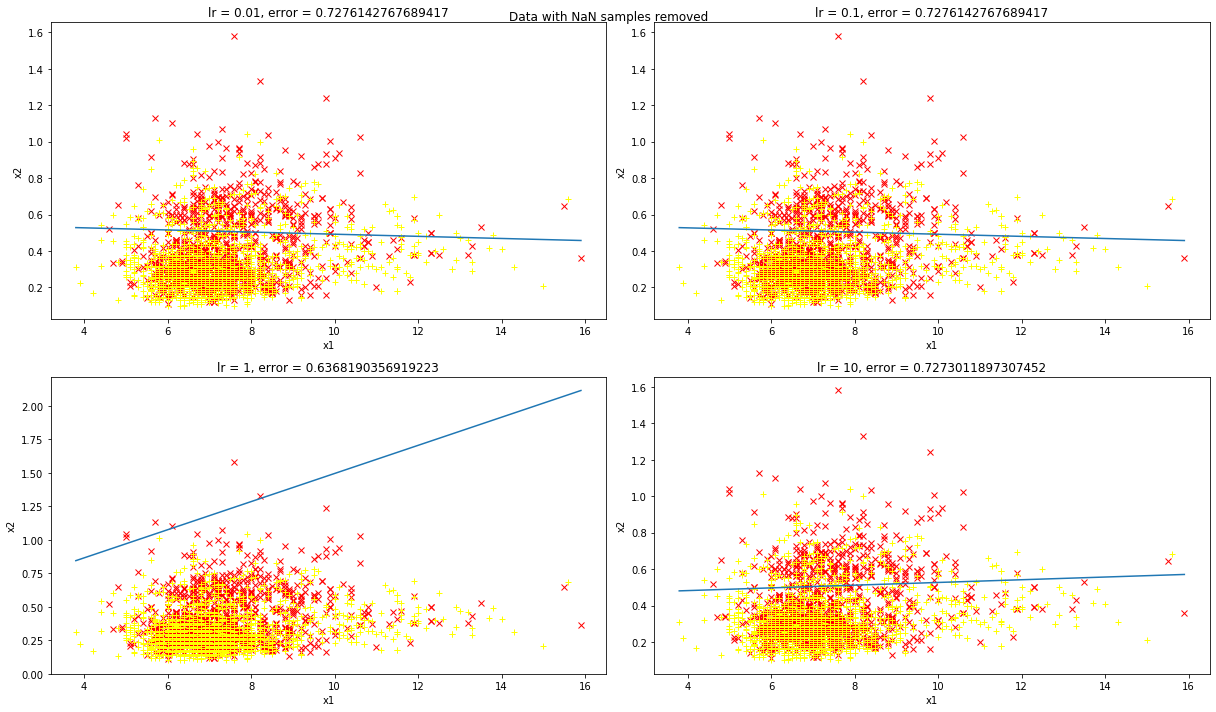

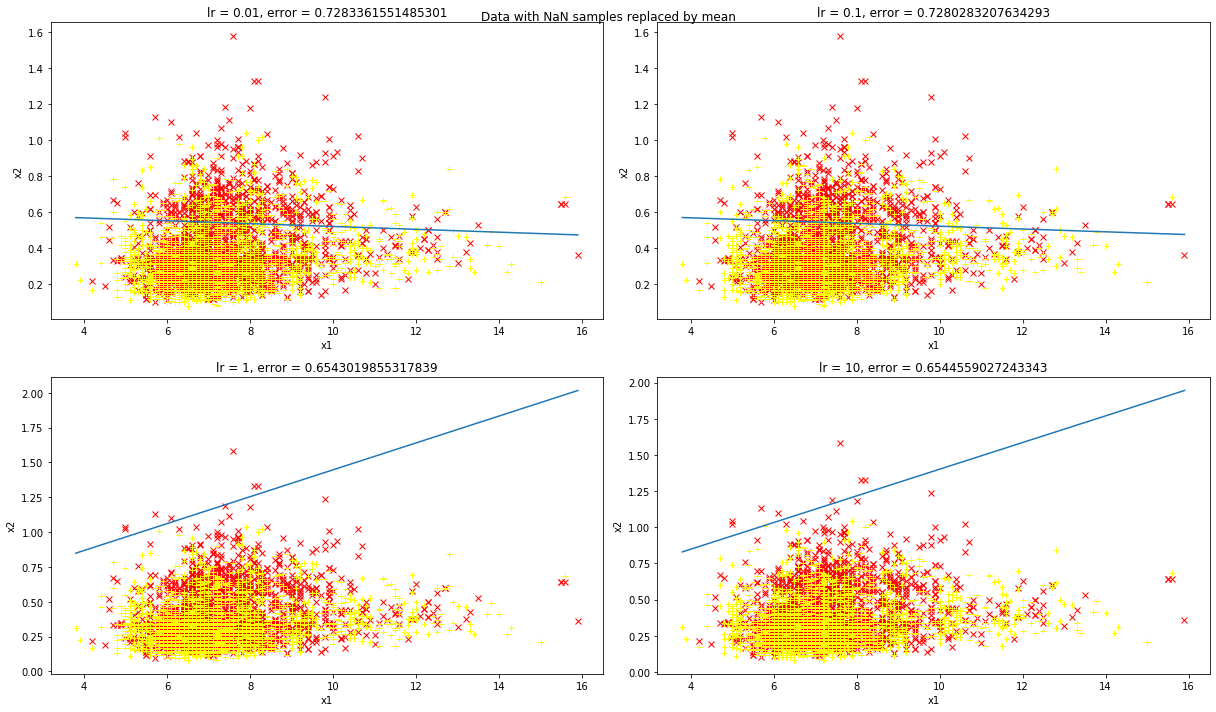

In [13]:
n = 10000
model = LogisticRegression(0.01, 10 * n)
cost = model.fit(X1[:,:2],y1 - 1)
#### Plot
plt.figure(figsize=(17, 10))
plt.subplot(2, 2, 1)
plt.plot(X1[y1[:, 0] == 1, 0], X1[y1[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X1[y1[:, 0] == 2, 0], X1[y1[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X1[:, 0]), np.max(X1[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X1[:,:2])
err = np.sum(yhat != y1) / X1.shape[0]
plt.title("lr = 0.01, " + "error = {s}".format(s=err))

model = LogisticRegression(0.1, n)
cost = model.fit(X1[:,:2],y1 - 1)
#### Plot
plt.subplot(2, 2, 2)
plt.plot(X1[y1[:, 0] == 1, 0], X1[y1[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X1[y1[:, 0] == 2, 0], X1[y1[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X1[:, 0]), np.max(X1[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X1[:,:2])
err = np.sum(yhat != y1) / X1.shape[0]
plt.title("lr = 0.1, " + "error = {s}".format(s=err))

model = LogisticRegression(1, n)
cost = model.fit(X1[:,:2],y1 - 1)
#### Plot
plt.subplot(2, 2, 3)
plt.plot(X1[y1[:, 0] == 1, 0], X1[y1[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X1[y1[:, 0] == 2, 0], X1[y1[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X1[:, 0]), np.max(X1[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X1[:,:2])
err = np.sum(yhat != y1) / X1.shape[0]
plt.title("lr = 1, " + "error = {s}".format(s=err))

model = LogisticRegression(10, n)
cost = model.fit(X1[:,:2],y1 - 1)
#### Plot
plt.subplot(2, 2, 4)
plt.plot(X1[y1[:, 0] == 1, 0], X1[y1[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X1[y1[:, 0] == 2, 0], X1[y1[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X1[:, 0]), np.max(X1[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X1[:,:2])
err = np.sum(yhat != y1) / X1.shape[0]
plt.title("lr = 10, " + "error = {s}".format(s=err))
plt.suptitle("Data with NaN samples removed")
plt.tight_layout()

#X2
model = LogisticRegression(0.01, 10 * n)
cost = model.fit(X2[:,:2],y2 - 1)
#### Plot
plt.figure(figsize=(17, 10))
plt.subplot(2, 2, 1)
plt.plot(X2[y2[:, 0] == 1, 0], X2[y2[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X2[y2[:, 0] == 2, 0], X2[y2[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X2[:, 0]), np.max(X2[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X2[:,:2])
err = np.sum(yhat != y2) / X2.shape[0]
plt.title("lr = 0.01, " + "error = {s}".format(s=err))

model = LogisticRegression(0.1, n)
cost = model.fit(X2[:,:2],y2 - 1)
#### Plot
plt.subplot(2, 2, 2)
plt.plot(X2[y2[:, 0] == 1, 0], X2[y2[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X2[y2[:, 0] == 2, 0], X2[y2[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X2[:, 0]), np.max(X2[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X2[:,:2])
err = np.sum(yhat != y2) / X2.shape[0]
plt.title("lr = 0.1, " + "error = {s}".format(s=err))

model = LogisticRegression(1, n)
cost = model.fit(X2[:,:2],y2 - 1)
#### Plot
plt.subplot(2, 2, 3)
plt.plot(X2[y2[:, 0] == 1, 0], X2[y2[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X2[y2[:, 0] == 2, 0], X2[y2[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X2[:, 0]), np.max(X2[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X2[:,:2])
err = np.sum(yhat != y2) / X2.shape[0]
plt.title("lr = 1, " + "error = {s}".format(s=err))

model = LogisticRegression(10, n)
cost = model.fit(X2[:,:2],y2 - 1)
#### Plot
plt.subplot(2, 2, 4)
plt.plot(X2[y2[:, 0] == 1, 0], X2[y2[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X2[y2[:, 0] == 2, 0], X2[y2[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X2[:, 0]), np.max(X2[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X2[:,:2])
err = np.sum(yhat != y2) / X2.shape[0]
plt.title("lr = 10, " + "error = {s}".format(s=err))
plt.suptitle("Data with NaN samples replaced by mean")
plt.tight_layout()

Now we remove the outliers and do the process: 


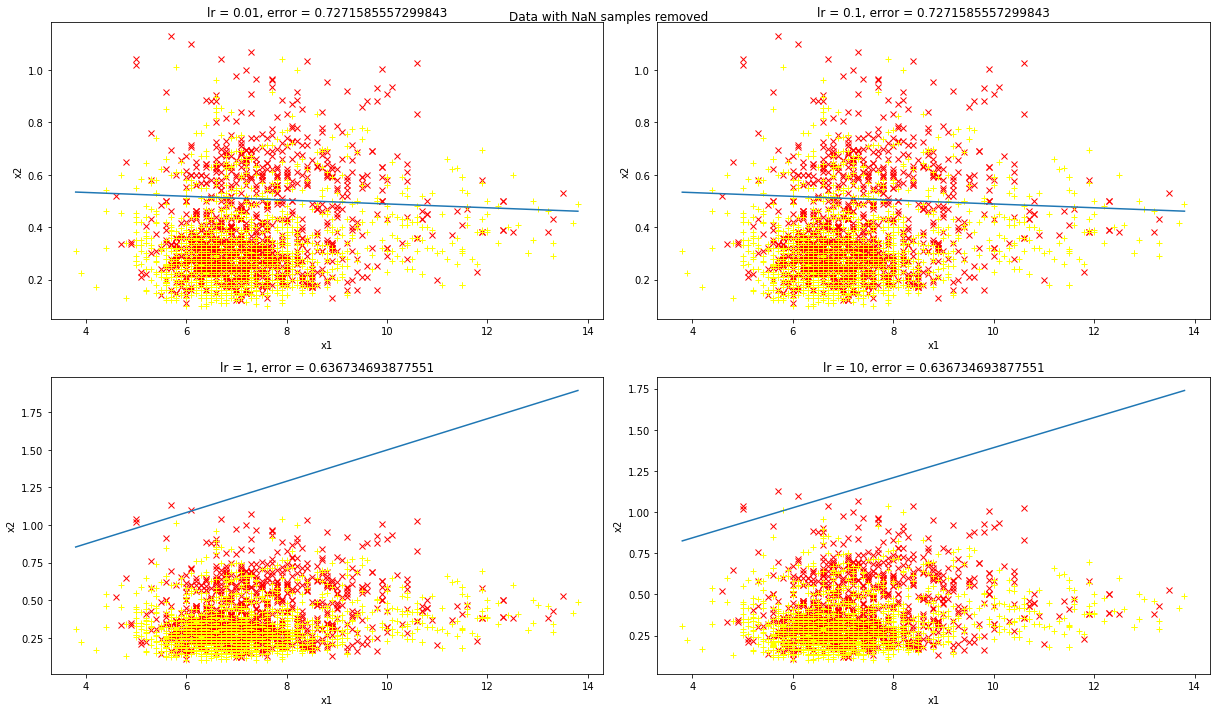

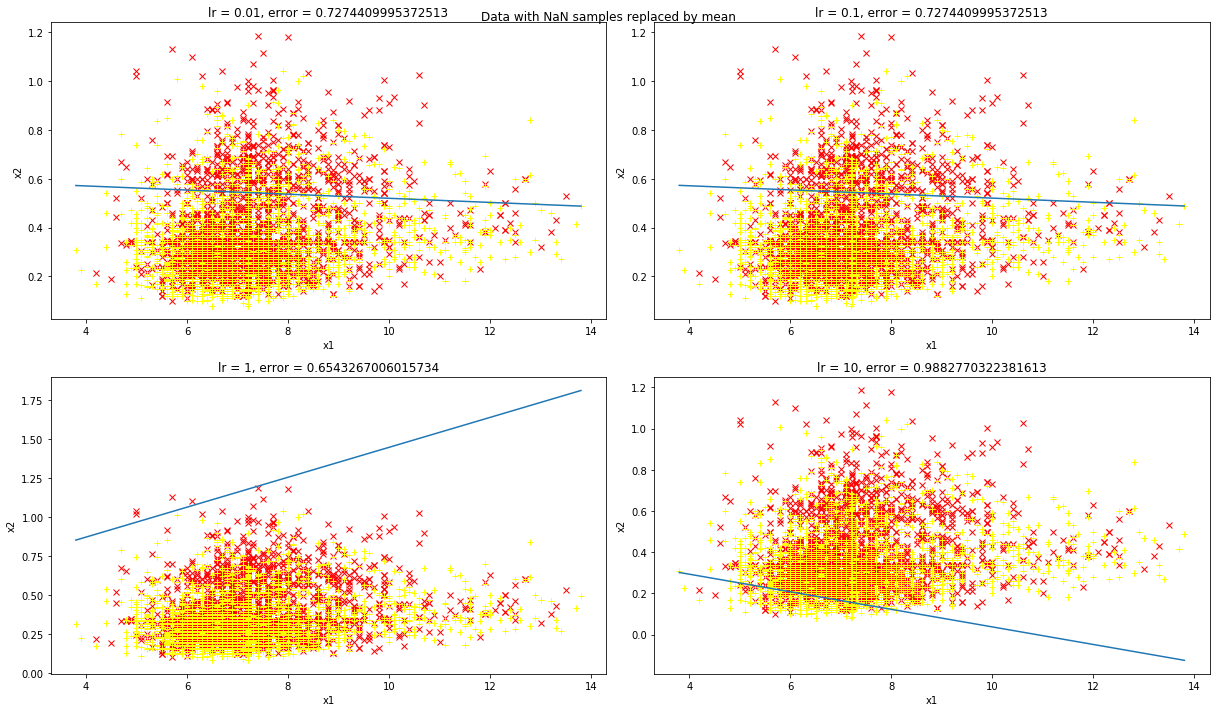

In [9]:
print("Now we remove the outliers and do the process: ")
y1 = y1[(X1[:, 0] < 14) & (X1[:, 1] < 1.2)]
X1 = X1[(X1[:, 0] < 14) & (X1[:, 1] < 1.2), :]

y2 = y2[(X2[:, 0] < 14) & (X2[:, 1] < 1.2)]
X2 = X2[(X2[:, 0] < 14) & (X2[:, 1] < 1.2), :]

n = 10000
model = LogisticRegression(0.01, 10 * n)
cost = model.fit(X1[:,:2],y1 - 1)
#### Plot
plt.figure(figsize=(17, 10))
plt.subplot(2, 2, 1)
plt.plot(X1[y1[:, 0] == 1, 0], X1[y1[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X1[y1[:, 0] == 2, 0], X1[y1[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X1[:, 0]), np.max(X1[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X1[:,:2])
err = np.sum(yhat != y1) / X1.shape[0]
plt.title("lr = 0.01, " + "error = {s}".format(s=err))

model = LogisticRegression(0.1, n)
cost = model.fit(X1[:,:2],y1 - 1)
#### Plot
plt.subplot(2, 2, 2)
plt.plot(X1[y1[:, 0] == 1, 0], X1[y1[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X1[y1[:, 0] == 2, 0], X1[y1[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X1[:, 0]), np.max(X1[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X1[:,:2])
err = np.sum(yhat != y1) / X1.shape[0]
plt.title("lr = 0.1, " + "error = {s}".format(s=err))

model = LogisticRegression(1, n)
cost = model.fit(X1[:,:2],y1 - 1)
#### Plot
plt.subplot(2, 2, 3)
plt.plot(X1[y1[:, 0] == 1, 0], X1[y1[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X1[y1[:, 0] == 2, 0], X1[y1[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X1[:, 0]), np.max(X1[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X1[:,:2])
err = np.sum(yhat != y1) / X1.shape[0]
plt.title("lr = 1, " + "error = {s}".format(s=err))

model = LogisticRegression(10, n)
cost = model.fit(X1[:,:2],y1 - 1)
#### Plot
plt.subplot(2, 2, 4)
plt.plot(X1[y1[:, 0] == 1, 0], X1[y1[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X1[y1[:, 0] == 2, 0], X1[y1[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X1[:, 0]), np.max(X1[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X1[:,:2])
err = np.sum(yhat != y1) / X1.shape[0]
plt.title("lr = 10, " + "error = {s}".format(s=err))
plt.suptitle("Data with NaN samples removed")
plt.tight_layout()

#X2
model = LogisticRegression(0.01, 10 * n)
cost = model.fit(X2[:,:2],y2 - 1)
#### Plot
plt.figure(figsize=(17, 10))
plt.subplot(2, 2, 1)
plt.plot(X2[y2[:, 0] == 1, 0], X2[y2[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X2[y2[:, 0] == 2, 0], X2[y2[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X2[:, 0]), np.max(X2[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X2[:,:2])
err = np.sum(yhat != y2) / X2.shape[0]
plt.title("lr = 0.01, " + "error = {s}".format(s=err))

model = LogisticRegression(0.1, n)
cost = model.fit(X2[:,:2],y2 - 1)
#### Plot
plt.subplot(2, 2, 2)
plt.plot(X2[y2[:, 0] == 1, 0], X2[y2[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X2[y2[:, 0] == 2, 0], X2[y2[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X2[:, 0]), np.max(X2[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X2[:,:2])
err = np.sum(yhat != y2) / X2.shape[0]
plt.title("lr = 0.1, " + "error = {s}".format(s=err))

model = LogisticRegression(1, n)
cost = model.fit(X2[:,:2],y2 - 1)
#### Plot
plt.subplot(2, 2, 3)
plt.plot(X2[y2[:, 0] == 1, 0], X2[y2[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X2[y2[:, 0] == 2, 0], X2[y2[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X2[:, 0]), np.max(X2[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X2[:,:2])
err = np.sum(yhat != y2) / X2.shape[0]
plt.title("lr = 1, " + "error = {s}".format(s=err))

model = LogisticRegression(10, n)
cost = model.fit(X2[:,:2],y2 - 1)
#### Plot
plt.subplot(2, 2, 4)
plt.plot(X2[y2[:, 0] == 1, 0], X2[y2[:, 0] == 1, 1], 'x', color = "red")
plt.plot(X2[y2[:, 0] == 2, 0], X2[y2[:, 0] == 2, 1], '+', color = "yellow")
xplot = np.array([np.min(X2[:, 0]), np.max(X2[:, 0])])
yplot = (-1. / model.w[2,0]) * (model.w[0,0] + model.w[1,0] * xplot)
plt.plot(xplot, yplot)
plt.xlabel("x1")
plt.ylabel("x2")
yhat = model.predict(X2[:,:2])
err = np.sum(yhat != y2) / X2.shape[0]
plt.title("lr = 10, " + "error = {s}".format(s=err))
plt.suptitle("Data with NaN samples replaced by mean")
plt.tight_layout()

## 3. Online Linear Regression 

In this question you will simulate an online linear regressor.
For more informain refer to the HW description file.

In the code cell below you should prepare your data as introduced in the first part of 'Linear Regression' question.
For convenience, you may load the whole original dataset and do the jobs required from beginning on the original given data in the HW folder or you can use results from previous parts.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# load dataset 
df = pd.read_csv('./JuiceQuality.csv', index_col=0) 
df = df.dropna()
X = np.array(df[df.columns[0:3]].iloc[0:370])
y = np.array(df["A Indx"].iloc[0:370])

In the code block below you should write your funcion which is a Gradient Descent optimizer.

In [4]:
def gd(X1, y, lr, w, num_iter):
    m = X1.shape[0]
    n = X1.shape[1]
    X = np.concatenate((X1, np.ones((m , 1))), axis=1)
    for i in range(num_iter):
        grad = (1. / m) * (((X @ w)- y ).T @ X).T
        w = w - lr * grad
    cost = (1. / m) * np.sum((X @ w - y) * (X @ w - y))
    return cost, w

Use your Gradient Descent function to find a (w,b) that satisfies the criteria introduced in the HW description file. Please note that you must set initial point for your optimizer at [5,-5,5,-5].

In [5]:
cost, wop = gd(X[0:300, :], y[0:300], 0.01, np.array([5, -5, 5, -5]), 10500)
print("Optimum point [w1, w2, w3, b] = ", wop)
print("Cost at optimum point is: ", cost.round(3))
print("Learning rate used is 0.01")

Optimum point [w1, w2, w3, b] =  [ 2.09390244  0.41770313  2.97190609 -0.17355034]
Cost at optimum point is:  0.095
Learning rate used is 0.01


<div>
<font color="orange" size=4>
Proof that $\mathbb{E}(\nabla l_r((\mathbf{w},b)^{(t)})|x^{(t)}) = \nabla L(x^{(t)})$
    <br />
    $\mathbb{E}(\nabla l_r((\mathbf{w},b)^{(t)})|x^{(t)}) = \sum_{i=0}^{i=m}p(r = i)\nabla l_i((\mathbf{w},b)^{(t)}) = \frac{1}{m}\sum_{i=0}^{i=m}
    \nabla l_i((\mathbf{w},b)^{(t)}) = \nabla L(x^{(t)})$
</font>
</div>

Now, let's go toward SGD! Please writw your code for implementing type 1 SGD (eta-constant type) below.

In [6]:
lr = 0.001
w = wop
wbar = np.zeros((70, 4))
mse_hist1 = np.zeros((70,))
Xs = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
for i in range(300, 370):
    x = Xs[i, :]
    yi = y[i]
    w = w - lr * 2 * x * (x @ w - yi)
    if i != 300:
        wbar[i - 300][0:4] = (1.0 / (i - 299)) * ((i - 300) * wbar[i - 301] + w)
    else:
        wbar[0][0:4] = w
    mse_hist1[i - 300] = (1.0 / 370)*sum((Xs @ wbar[i - 300] - y) * (Xs @ wbar[i - 300] - y))

print("MSE error: ", mse_hist1[69])
print("W: ", w)
print("Learnig rate: ", lr)

MSE error:  0.09633225828908248
W:  [ 2.08817646  0.41893358  2.97121292 -0.17429917]
Learnig rate:  0.001


Please write your code for implementing type 2 SGD (eta-variable type) below.

In [7]:
lr = 0.001
w = wop
wbar = np.zeros((70, 4))
mse_hist2 = np.zeros((70,))
for i in range(300, 370):
    Xs = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    x = Xs[i]
    yi = y[i]
    w = w - lr * 2 * x * (x @ w - yi) / np.sqrt(i - 299)
    if i != 300:
        wbar[i - 300][0:4] = (1.0 / (i - 299)) * ((i - 300) * wbar[i - 301] + w)
    else:
        wbar[0][0:4] = w
    mse_hist2[i - 300] = (1. / 370)*sum((Xs @ wbar[i - 300] - y) * (Xs @ wbar[i - 300] - y))

print("MSE error: ", mse_hist2[69])
print("W: ", w)
print("Learnig rate: ", lr)

MSE error:  0.09480980940318916
W:  [ 2.09889236  0.41829236  2.97196247 -0.1728954 ]
Learnig rate:  0.001


<font color="orange" size=4>
    Advantage of this method over the previous one is that it converges faster for values of w which are far from the optimal w.
    Here since the initial value is close to optimal value they don't differ much.
</font>

Below, you may provide the plots requested in the last part of the question.

In [8]:
lr = 0.0181
w = wop
wbar = np.zeros((70, 4))
mse_hist1 = np.zeros((70,))
for i in range(300, 370):
    Xs = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    x = Xs[i]
    yi = y[i]
    w = w - lr * 2 * x * (x @ w - yi)
    if i != 300:
        wbar[i - 300][0:4] = (1.0 / (i - 299)) * ((i - 300) * wbar[i - 301] + w)
    else:
        wbar[0][0:4] = w
    mse_hist1[i - 300] = (1. / 370)*sum((Xs @ wbar[i - 300] - y) * (Xs @ wbar[i - 300] - y))
    
print("MSE error method one: ", mse_hist1[69])
print("Greatest learning rate for method one: ", lr)
lr1 = lr
lr = 0.0593
w = wop
wbar = np.zeros((70, 4))
mse_hist2 = np.zeros((70,))
for i in range(300, 370):
    Xs = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    x = Xs[i]
    yi = y[i]
    w = w - lr * 2 * x * (x @ w - yi) / np.sqrt(i - 299)
    if i != 300:
        wbar[i - 300][0:4] = (1.0 / (i - 299)) * ((i - 300) * wbar[i - 301] + w)
    else:
        wbar[0][0:4] = w
    mse_hist2[i - 300] = (1. / 370)*sum((Xs @ wbar[i - 300] - y) * (Xs @ wbar[i - 300] - y))

print("MSE error method two: ", mse_hist2[69])
print("Greatest learning rate for method two: ", lr)
print("GLR M2 / GLR M1 = ", lr / lr1)

MSE error method one:  0.14877535732556144
Greatest learning rate for method one:  0.0181
MSE error method two:  0.149813432554696
Greatest learning rate for method two:  0.0593
GLR M2 / GLR M1 =  3.2762430939226515


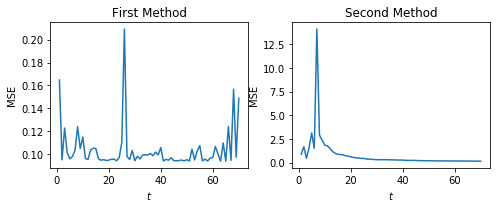

In [9]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.plot(np.arange(70) + 1, mse_hist1, "-");
plt.xlabel("$t$")
plt.ylabel("MSE")
plt.title("First Method")
plt.subplot(1, 2, 2)
plt.plot(np.arange(70) + 1, mse_hist2, "-");
plt.xlabel("$t$")
plt.ylabel("MSE")
plt.title("Second Method")
plt.tight_layout()

<div>
<font color="orange" size=4>
    For first method the MSE doesn't have converging behaviour since its lr is high, for second method however, the MSE is very high at first 
    because its learning rate is high but it converges after 6 iterations because the learning is rate is getting smaller.
</font>
</div>